In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
from zipfile import ZipFile
import os

In [3]:
# list the files in the updated directory
files_list = os.listdir("/content/women fashion")
print(files_list[:2])
print(len(files_list))

['blue dress with a floral pattern.jpg', 'sparkling, fitted dress with long sleeves.jpg']
96


In [9]:
def display_image(file_path):
  image=Image.open(file_path)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

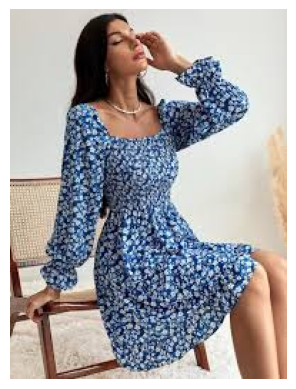

In [10]:
file_path=os.path.join("/content/women fashion/",files_list[0])
display_image(file_path)

In [11]:
files_list[0]

'blue dress with a floral pattern.jpg'

Now, we will create a list of all image file paths that will be used later in extracting the features from every image in the dataset:

In [12]:
import glob

In [13]:
folder_path = '/content/women fashion'

In [16]:
image_path_list = [os.path.join(folder_path,file) for file in files_list if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]
image_path_list[:3]

['/content/women fashion/blue dress with a floral pattern.jpg',
 '/content/women fashion/sparkling, fitted dress with long sleeves.jpg',
 '/content/women fashion/long, elegant, teal dress with a high slit on one side.jpg']

In [17]:
len(image_path_list)

96

In [33]:
import tensorflow

In [36]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

In [37]:
base_model = VGG16(weights='imagenet',include_top=False)
model = Model(inputs=base_model.input,outputs=base_model.output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [54]:
from tensorflow.keras.preprocessing import image
def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  image_array = image.img_to_array(img)
  image_array_expanded = np.expand_dims(image_array,axis=0)
  return preprocess_input(image_array_expanded)


In [46]:
def extract_features(model,preprocessed_image):
  features = model.predict(preprocessed_img)
  flattened_features = features.flatten()
  normalized_features = flattened_features / np.linalg.norm(flattened_features)
  return normalized_features

In [47]:
all_features = []
all_image_names = []

In [49]:
for image_path in image_path_list:
  preprocessed_img = preprocess_image(image_path)
  features = extract_features(model,preprocessed_img)
  all_features.append(features)
  all_image_names.append(os.path.basename(image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541

In [51]:
preprocess_image(image_path_list[0])

img:  <PIL.Image.Image image mode=RGB size=224x224 at 0x7C57BC2D2BC0>
image_array:  [[[212. 208. 199.]
  [212. 208. 199.]
  [212. 208. 199.]
  ...
  [221. 222. 217.]
  [220. 219. 215.]
  [220. 219. 215.]]

 [[212. 208. 199.]
  [212. 208. 199.]
  [212. 208. 199.]
  ...
  [221. 222. 217.]
  [220. 219. 215.]
  [220. 219. 215.]]

 [[211. 207. 198.]
  [211. 207. 198.]
  [211. 207. 198.]
  ...
  [221. 222. 217.]
  [220. 219. 215.]
  [220. 219. 215.]]

 ...

 [[213. 195. 181.]
  [206. 190. 175.]
  [212. 194. 180.]
  ...
  [190. 123.  97.]
  [203. 138. 110.]
  [202. 138. 110.]]

 [[212. 194. 180.]
  [207. 189. 175.]
  [213. 195. 181.]
  ...
  [192. 122.  97.]
  [203. 137. 111.]
  [202. 138. 110.]]

 [[211. 193. 179.]
  [207. 189. 175.]
  [213. 195. 181.]
  ...
  [192. 122.  97.]
  [203. 137. 111.]
  [202. 138. 110.]]]
image.. [[[[212. 208. 199.]
   [212. 208. 199.]
   [212. 208. 199.]
   ...
   [221. 222. 217.]
   [220. 219. 215.]
   [220. 219. 215.]]

  [[212. 208. 199.]
   [212. 208. 199.]
 

array([[[[ 95.061    ,  91.221    ,  88.32     ],
         [ 95.061    ,  91.221    ,  88.32     ],
         [ 95.061    ,  91.221    ,  88.32     ],
         ...,
         [113.061    , 105.221    ,  97.32     ],
         [111.061    , 102.221    ,  96.32     ],
         [111.061    , 102.221    ,  96.32     ]],

        [[ 95.061    ,  91.221    ,  88.32     ],
         [ 95.061    ,  91.221    ,  88.32     ],
         [ 95.061    ,  91.221    ,  88.32     ],
         ...,
         [113.061    , 105.221    ,  97.32     ],
         [111.061    , 102.221    ,  96.32     ],
         [111.061    , 102.221    ,  96.32     ]],

        [[ 94.061    ,  90.221    ,  87.32     ],
         [ 94.061    ,  90.221    ,  87.32     ],
         [ 94.061    ,  90.221    ,  87.32     ],
         ...,
         [113.061    , 105.221    ,  97.32     ],
         [111.061    , 102.221    ,  96.32     ],
         [111.061    , 102.221    ,  96.32     ]],

        ...,

        [[ 77.061    ,  78.221    ,  8

n the above code, a feature extraction process is implemented using the VGG16 model, a popular convolutional neural network pre-trained on the ImageNet dataset, to extract visual features from images stored in image_paths_list.

Initially, the VGG16 model is loaded without its top classification layer (include_top=False), making it suitable for feature extraction rather than classification. Each image path from image_paths_list is processed through a series of steps: the image is loaded and resized to 224×224 pixels to match the VGG16 input size requirements, converted to a NumPy array, and preprocessed to fit the model’s expected input format.


The preprocessed images are then fed into the VGG16 model to extract features, which are subsequently flattened and normalized to create a consistent feature vector for each image. These feature vectors (all_features) and their corresponding image filenames (all_image_names) are stored, providing a structured dataset for the next steps in building a fashion recommendation system using image features.

Now, I’ll write a function to recommend fashion images based on image feature

In [52]:
from scipy.spatial.distance import cosine

In [63]:
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
      print("idx: ",idx)
      image_path = os.path.join('/content/women fashion/', all_image_names[idx])
      plt.subplot(1, top_n + 1, i + 1)
      plt.imshow(Image.open(image_path))
      plt.title(f"Recommendation {i}")
      plt.axis('off')

    plt.tight_layout()
    plt.show()

In the above code, we defined a function recommend_fashion_items_cnn, which recommends fashion items similar to a given input image using deep learning-based feature extraction. It utilizes the VGG16 model to extract high-dimensional feature vectors from images, capturing their visual essence.

For a specified input image, the function preprocesses the image, extracts its features, and calculates the cosine similarity between this feature vector and those of other images in the dataset (all_features). It ranks these images based on similarity and selects the top N most similar images to recommend, explicitly excluding the input image from being recommended to itself by filtering out its index from the list of similar indices.

In the end, the function will visualize the input image and its recommendations by displaying them.

Now, here’s how we can use this function to recommend images based on a similar fashion in the input image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
idx:  79
idx:  88
idx:  50
idx:  18
idx:  96


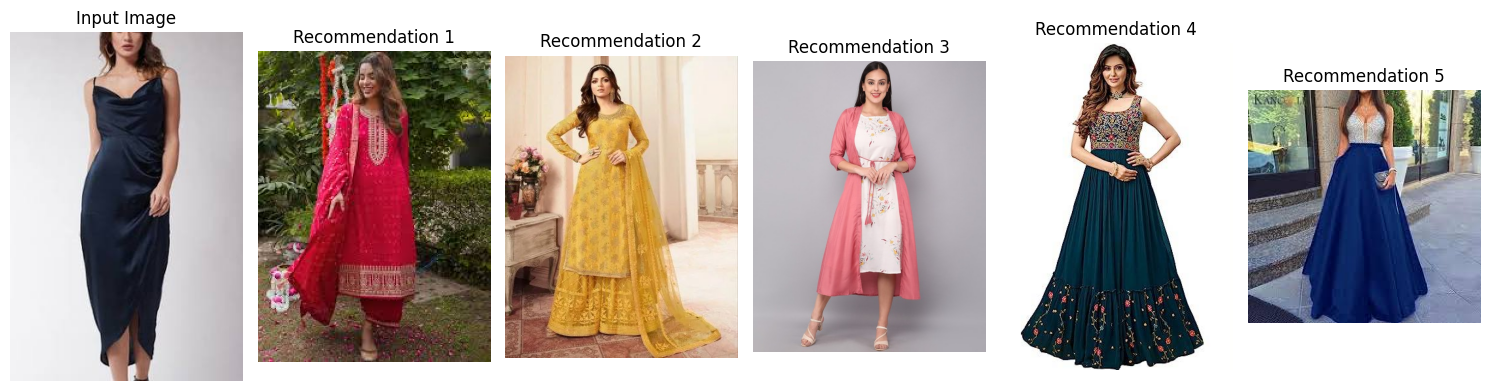

In [65]:
input_image_path = '/content/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_path_list, model, top_n=5)